<a href="https://colab.research.google.com/github/elinahlyva-dataanalytics/data-analytics-portfolio/blob/main/filme/filme_schauspieler_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=======Movie-Projekt – Analyse von Wikipedia-Filmdaten =======

Zu Beginn wird Google Colab mit Google Drive verbunden, anschließend werden die benötigten Bibliotheken in Python importiert

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Überblick über die Datensätze: Zunächst wird die Liste der verfügbaren json‑Dateien unter https://github.com/prust/wikipedia-movie-data/tree/master
 eingesehen. Anschließend wird eine Datei ausgewählt, die ein bestimmtes Jahr im Namen trägt, um deren Struktur kennenzulernen. Daraufhin wird eine Sequenz an Dateinamen festgelegt, die eingelesen werden soll. Zur Generierung der Jahresfolge wird die Funktion numpy.arange verwendet. Die Sequenz umfasst 5 Datensätze (von 19700 bis 2010 inklusive). Die vollständigen URLs werden durch String‑Konkatenation erzeugt.

In [6]:
movie_list_years=np.arange(1970, 2000, 10) # Die Funktion np.arange akzeptiert die Parameter start, stop und step. Daher wird der Startwert, Endwert und das Intervall in Jahren angegeben.
movies_1970=pd.read_json('https://raw.githubusercontent.com/prust/wikipedia-movie-data/master/movies-1970s.json')
movies_1980=pd.read_json('https://raw.githubusercontent.com/prust/wikipedia-movie-data/master/movies-1980s.json')
movies_1990=pd.read_json('https://raw.githubusercontent.com/prust/wikipedia-movie-data/master/movies-1990s.json')
movies_2000=pd.read_json('https://raw.githubusercontent.com/prust/wikipedia-movie-data/master/movies-2000s.json')
movies_2010=pd.read_json('https://raw.githubusercontent.com/prust/wikipedia-movie-data/master/movies-2010s.json')


In [7]:
movies_2010.head()

,title,year,cast,genres,href,extract,thumbnail,thumbnail_width,thumbnail_height
0,Winter Day Dreams ft. Franny's Feet and Olivia,2010,"[Franny's Feet, ), Phoebe McAuley, George Buza...","[Animated, Family]",Franny%27s_Feet,Franny's Feet is a Canadian animated children'...,https://upload.wikimedia.org/wikipedia/commons...,200.0,108.0
1,Garbage Dreams,2010,[],[Documentary],Garbage_Dreams,Garbage Dreams is a 2009 feature length docume...,NaN,NaN,NaN
2,Sweetgrass,2010,[],[Documentary],Sweetgrass_(film),Sweetgrass is a 2009 documentary film that fol...,https://upload.wikimedia.org/wikipedia/en/6/62...,260.0,384.0
3,Daybreakers,2010,"[Ethan Hawke, Willem Dafoe, Sam Neill, Claudia...","[Action, Horror, Science Fiction]",Daybreakers,Daybreakers is a 2009 science-fiction action h...,https://upload.wikimedia.org/wikipedia/en/b/b4...,259.0,383.0
4,Leap Year,2010,"[Amy Adams, Matthew Goode, Adam Scott, John Li...","[Comedy, Romance]",Leap_Year_(2010_film),Leap Year is a 2010 romantic comedy directed b...,https://upload.wikimedia.org/wikipedia/en/d/da...,259.0,383.0


2. Einlesen und Bereinigung der Daten: Danach werden alle ausgewählten Dateien in einer Schleife als JSON‑Objekt eingelesen. Nicht benötigte Attribute werden entfernt, u. a.: ['href', 'extract', 'thumbnail', 'thumbnail_width', 'thumbnail_height']. Zudem werden nur vollständige Einträge (ohne fehlende Werte) berücksichtigt. Alle bereinigten Einzeldateien werden schließlich zu einem einzigen Datensatz zusammengeführt

In [8]:
# Nicht benötigte Spalten werden entfernt und unvollständige Zeilen (mit fehlenden Werten) schrittweise aus jeder Datei gefiltert.

movies_1970_clean=movies_1970.drop(['href', 'extract', 'thumbnail', 'thumbnail_width', 'thumbnail_height'], axis=1)
movies_1970_clean=movies_1970_clean.dropna()

movie_1980_clean=movies_1980.drop(['href', 'extract', 'thumbnail', 'thumbnail_width', 'thumbnail_height'], axis=1)
movie_1980_clean=movie_1980_clean.dropna()

movies_1990_clean=movies_1990.drop(['href', 'extract', 'thumbnail', 'thumbnail_width', 'thumbnail_height'], axis=1)
movies_1990_clean=movies_1990_clean.dropna()

movies_2000_clean=movies_2000.drop(['href', 'extract', 'thumbnail', 'thumbnail_width', 'thumbnail_height'], axis=1)
movies_2000_clean=movies_2000_clean.dropna()

movies_2010_clean=movies_2010.drop(['href', 'extract', 'thumbnail', 'thumbnail_width', 'thumbnail_height'], axis=1)
movies_2010_clean=movies_2010_clean.dropna()

# Die DataFrames werden mit der Funktion concat zusammengeführt.
# Mit ignore_index=True wird verhindert, dass sich die Indizes wiederholen, da die Datensätze vertikal aneinander gehängt werden

movies_arranged=pd.concat([movies_1970_clean, movie_1980_clean, movies_1990_clean, movies_2000_clean, movies_2010_clean], ignore_index=True)

3. Überprüfung und Sicherung des finalen Datensatzes: Die finale Tabelle sollte 4 Spalten enthalten. Anschließend wird eine Kopie als .csv oder .json gespeichert, um im Fall eines Datenverlusts die Verarbeitung nicht erneut durchführen zu müssen.

In [9]:
movies_arranged.shape # Überprüfung der Datensatzgröße: 4 Spalten und 11.680 Zeilen
movies_arranged.to_csv('movies_arrangend.csv') # Speichern des bereinigten Datensatzes als CSV-Kopie

4. Erste Übersicht: bei JSON‑Dateien wird nicht die Methode .describe() empfohlen, da die Struktur verschachtelte Elemente enthalten kann.
Stattdessen werden die ersten Einträge sowie die Grundstruktur mithilfe von .info() überprüft.

In [10]:
movies_arranged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11680 entries, 0 to 11679
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   11680 non-null  object
 1   year    11680 non-null  int64 
 2   cast    11680 non-null  object
 3   genres  11680 non-null  object
dtypes: int64(1), object(3)
memory usage: 365.1+ KB


5. Analyse der Filmgenres: Es werden die Top‑10 Genres nach Anzahl der Filme ermittelt. Die Ergebnisse werden als Balkendiagramm dargestellt. Zusätzlich wird eine übersichtliche Tabelle ausgegeben.

In [11]:
# Ein Film kann mehreren Genres zugeordnet sein – die Genres liegen also als Liste vor.
# Um die tatsächliche Häufigkeit zu berechnen, muss diese Liste pro Filmzeile aufgelöst werden.

genres_exploded=movies_arranged['genres'].explode()
genres_exploded.value_counts().head(10)

,count
genres,
Comedy,4096
Drama,4030
Action,1582
Thriller,1414
Horror,1205
Romance,1080
Crime,869
Science Fiction,784
Adventure,563


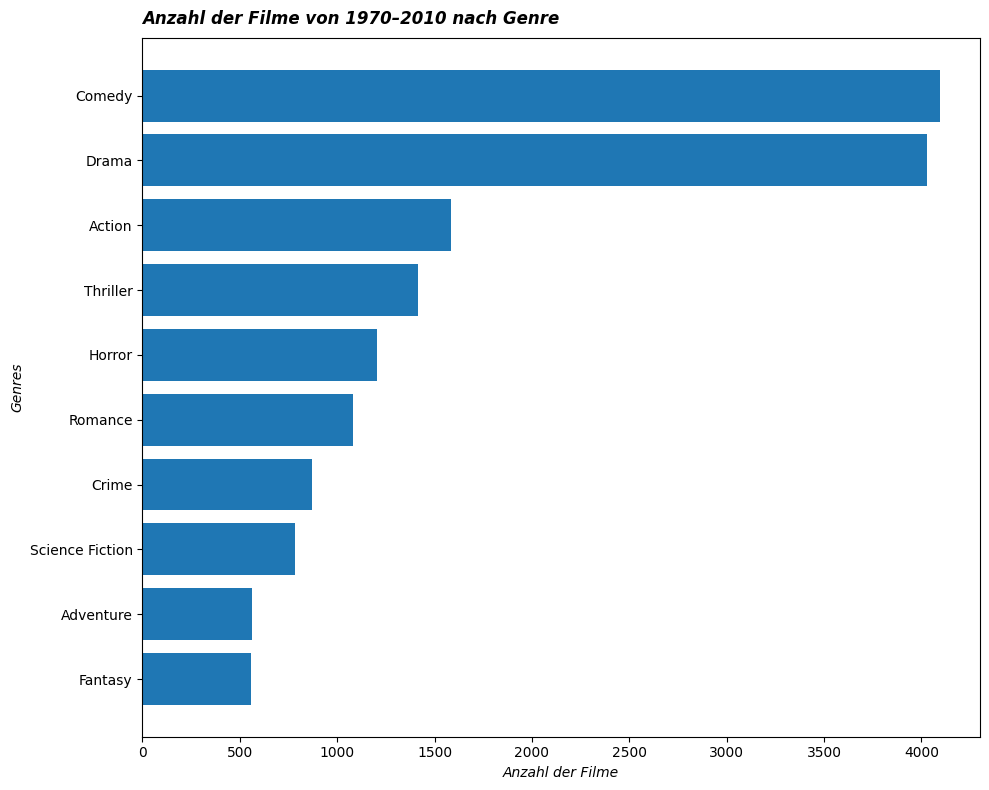

In [12]:
import matplotlib.pyplot as plt

genre_counts=genres_exploded.value_counts().head(10).sort_values(ascending=True) # die Daten werden vorab sortiert, um die Darstellung im horizontalen Balkendiagramm (barh) zu verbessern.

plt.figure(figsize=(10,8))
plt.barh(genre_counts.index, genre_counts.values)

# Diagrammtitel
plt.title('Anzahl der Filme von 1970–2010 nach Genre', fontstyle='italic', fontsize='large', loc='left', fontweight='bold', pad=10)
plt.xlabel('Anzahl der Filme', fontstyle='italic')
plt.ylabel('Genres', fontstyle='italic')
plt.tight_layout()
plt.show()

6. Zeitliche Entwicklung der beliebtesten Genres: Anschließend werden die Top‑3 der meistvertretenen Genres ausgewählt und deren Entwicklung über den zuvor definierten Zeitraum analysiert. Dafür wird die Anzahl der Filme pro Genre und Jahr berechnet. Die Ergebnisse werden anschließend in Form eines Liniendiagramms dargestellt.

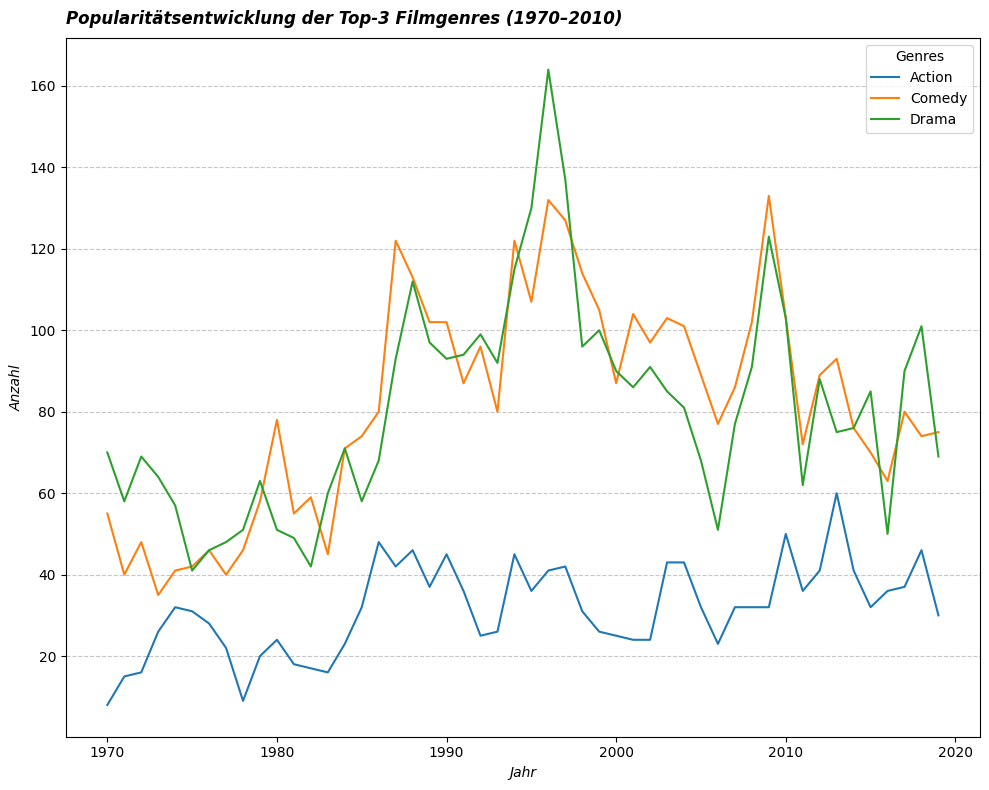

In [13]:
# 1. Genres werden aufgelöst (dieser Schritt wurde bereits oben durchgeführt)
genres_exploded = movies_arranged.explode('genres')

# 2. Die Jahresangabe wird erneut zur Tabelle hinzugefügt, da beim Auflösen (explode) durch Duplikate manche Jahreswerte eventuell verloren gingen
genres_exploded['year'] = movies_arranged['year']

# 3. Die drei beliebtesten Genres werden ermittelt
top_3_genres = genres_exploded['genres'].value_counts().head(3).index.tolist() #.index.tolist() переведемо формат у список, щоб можна було фільтрувати далі DataFrame

# 4. Gruppierung: Anzahl der Filme je Genre und Jahr berechnen
genre_by_year = genres_exploded.groupby(['year', 'genres']).size().reset_index(name='count') #.size() порахує кількість записів у кожній групі, .reset_index(name='count') скидає індекси (робить вичайні колонки year, genres) і надає ім’я колонці з кількістю — 'count'

# 5. Filterung: Nur die Top-3 Genres werden berücksichtigt
filtered = genre_by_year[genre_by_year['genres'].isin(top_3_genres)]

# Pivot-Tabelle (Jahr – Genre – Anzahl) zur Vereinfachung der Visualisierung
pivot = filtered.pivot(index='year', columns='genres', values='count') # Genres werden zu Spalten, plot() erstellt automatisch Linien für jede Spalte

# 7.7. Liniendiagramm erstellen
pivot.plot(figsize=(10, 8))

plt.title('Popularitätsentwicklung der Top-3 Filmgenres (1970–2010)', fontstyle='italic', fontsize='large', loc='left', fontweight='bold', pad=10)
plt.xlabel('Jahr', fontstyle='italic')
plt.ylabel('Anzahl', fontstyle='italic')
plt.legend(title='Genres')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Rasterlinien entlang der Y-Achse hinzufügen
plt.tight_layout()
plt.show()

7. Analyse der Schauspieler: Es werden die Top‑10 Schauspieler nach Anzahl der Filmauftritte ermittelt. Dazu werden ein Balken‑ und Kreisdiagramm erstellt sowie eine Tabelle mit den Ergebnissen ausgegeben.

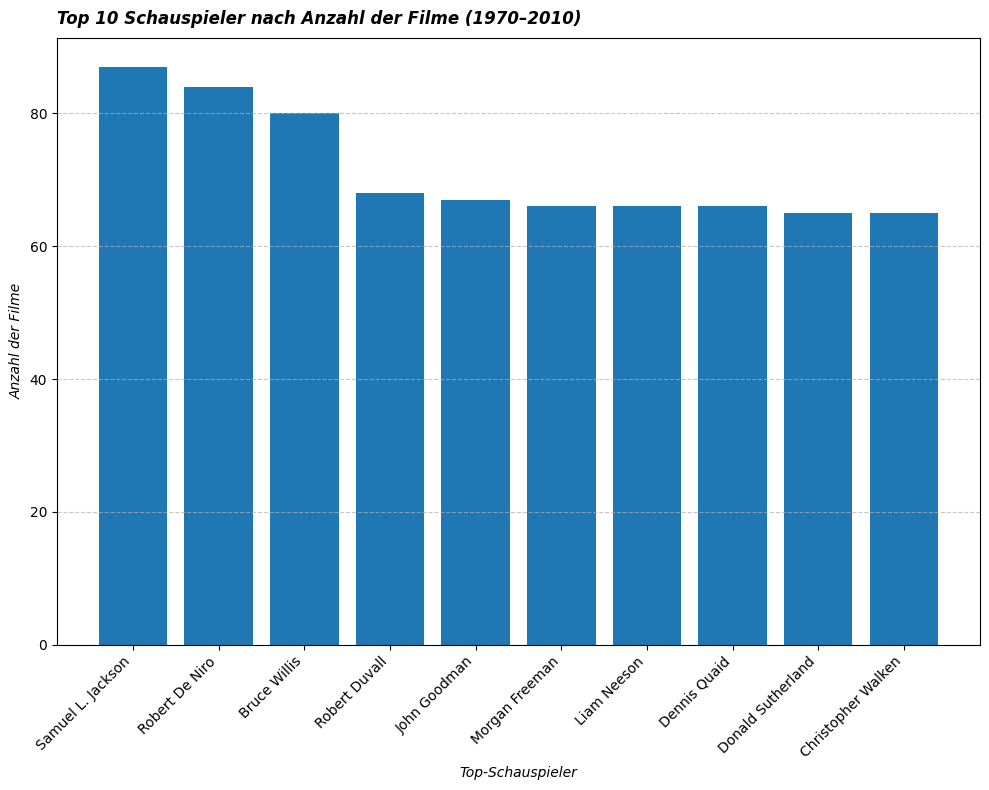

In [14]:
# Die Schauspieler-Liste wird – wie zuvor bei den Genres – aufgelöst (explode)
actors_exploded = movies_arranged.explode('cast')

# Die zehn meistvertretenen Schauspieler nach Anzahl der Filme werden ermittelt
top_actors = actors_exploded['cast'].value_counts().head(10)
x_pos_actors=np.arange(len(top_actors)) # Bestimmung der numerischen X-Koordinaten für das Balkendiagramm, da plt.bar numerische Werte auf der X-Achse erwartet. len(top_actors) gibt die Anzahl zurück, np.arange erzeugt ein Array [0,1,2,...]

plt.figure(figsize=(10,8))
plt.bar(x_pos_actors, top_actors.values)
plt.title('Top 10 Schauspieler nach Anzahl der Filme (1970–2010)', fontstyle='italic', fontsize='large', loc='left', fontweight='bold', pad=10)
plt.xlabel('Top-Schauspieler', fontstyle='italic')
plt.ylabel('Anzahl der Filme', fontstyle='italic')

plt.xticks(x_pos_actors, top_actors.index, rotation=45, ha='right') # X-Achsenbeschriftung um 45° drehen für bessere Lesbarkeit, ha='right' richtet die Beschriftung rechtsbündig aus, um Überlappungen zu vermeiden
plt.grid(axis='y', linestyle='--', alpha=0.7) # Rasterlinien entlang der Y-Achse hinzufügen
plt.tight_layout() # Optimierung des Layouts, damit Beschriftungen nicht abgeschnitten werden
plt.show()


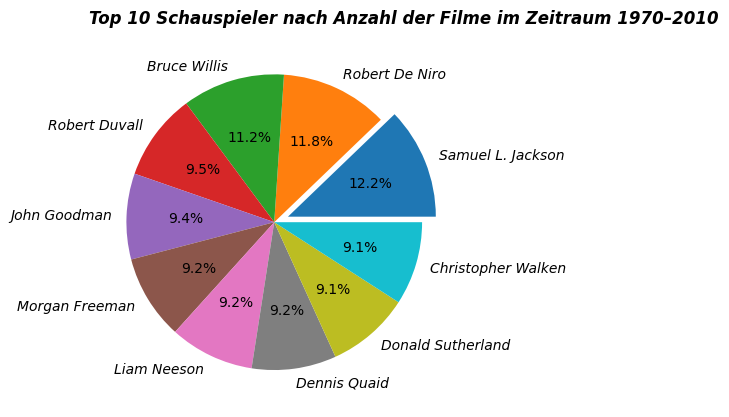

In [19]:
# Erstellung eines Kreisdiagramms (Pie Chart). Definition von wedges, texts und autotexts, um später Stil und Darstellung anzupassen
wedges, texts, autotexts = plt.pie(
    x=top_actors.values,
    labels=top_actors.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('tab10', len(top_actors)), # Verwendung der Farbpalette "tab10" aus seaborn
    explode=[0.1] + [0]*9 # Der erste Sektor wird um 0.1 vom Zentrum hervorgehoben, die anderen bleiben an Ort und Stelle
)

# Diagrammtitel
plt.title('Top 10 Schauspieler nach Anzahl der Filme im Zeitraum 1970–2010', fontstyle='italic', fontsize='large', loc='left', fontweight='bold', pad=10)

# Stil der Beschriftungen: kursiv
for text in texts:
    text.set_fontstyle('italic')

# Diagramm anzeigen
plt.show()

In [16]:
# Tabelle mit den Top-Schauspielern anzeigen
top_actors

# Alternativ – längerer Code, aber identisches Ergebnis:
#top_actors_table=actors_exploded['cast'].value_counts().head(10)
#display(top_actors_table)

,count
cast,
Samuel L. Jackson,87
Robert De Niro,84
Bruce Willis,80
Robert Duvall,68
John Goodman,67
Morgan Freeman,66
Liam Neeson,66
Dennis Quaid,66
Donald Sutherland,65


8. Zeitliche Entwicklung der beliebtesten Schauspieler: Die Top‑3 Schauspieler werden ausgewählt, um die Entwicklung ihrer Filmauftritte über die Jahre zu untersuchen. Die Anzahl der Filme pro Schauspieler und Jahr wird berechnet und als Liniendiagramm dargestellt.

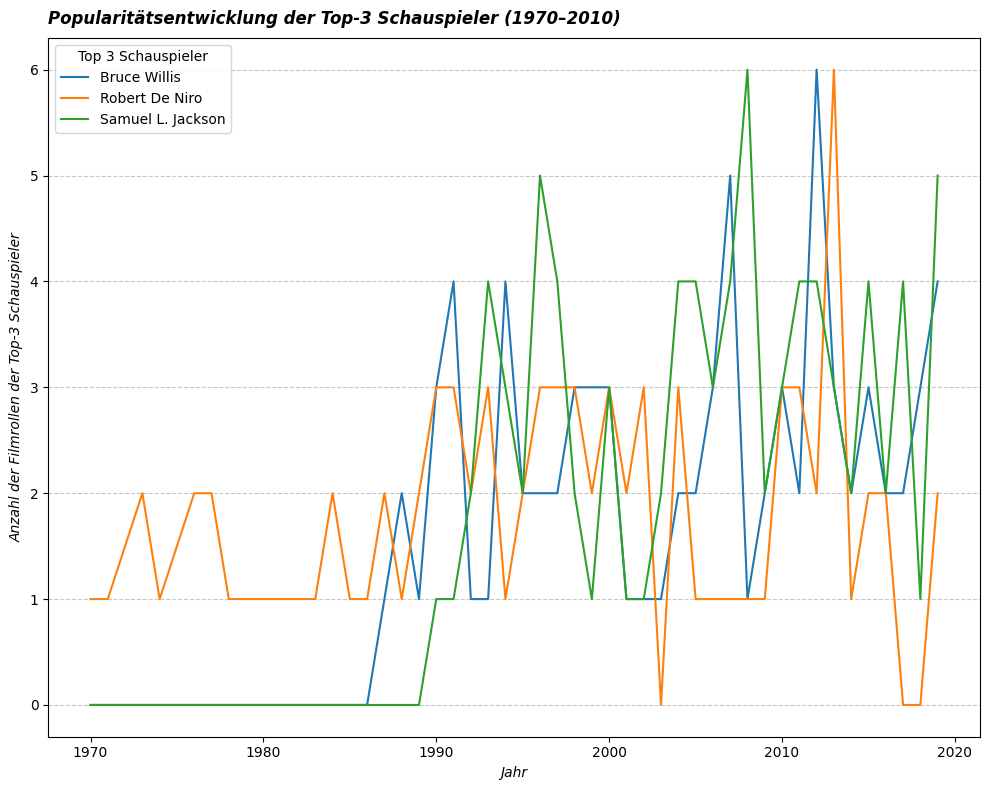

In [17]:
#3. Die drei beliebtesten Schauspieler werden ermittelt
top_3_actors = actors_exploded['cast'].value_counts().head(3).index.tolist() # .index.tolist() konvertiert das Ergebnis in eine Liste zur späteren Filterung des Dataframes

# 4. Filterung des DataFrames 'actors_exploded' auf Filme mit den Top-3 Schauspielern
filtered_actors_exploded = actors_exploded[actors_exploded['cast'].isin(top_3_actors)]

#5. Gruppierung nach Jahr und Schauspieler und berechnen die Anzahl der Filme. Wir erhalten die Einträge für die Top-3 Schauspieler.
top_3_actors_by_year = filtered_actors_exploded.groupby(['year', 'cast']).size().reset_index(name='count') # .size() zählt Einträge pro Gruppe, .reset_index(name='count') erstellt reguläre Spalten

#6. Erstellung einer Pivot-Tabelle (Jahr – Schauspieler – Anzahl), um die Visualisierung zu vereinfachen
pivot = top_3_actors_by_year.pivot(index='year', columns='cast', values='count').fillna(0) # Fehlende Werte (NaN) durch 0 ersetzen – für Jahre ohne Auftritte

#7. Liniendiagramm erstellen
pivot.plot(figsize=(10, 8))

plt.title('Popularitätsentwicklung der Top-3 Schauspieler (1970–2010)', fontstyle='italic', fontsize='large', loc='left', fontweight='bold', pad=10)
plt.xlabel('Jahr', fontstyle='italic')
plt.ylabel('Anzahl der Filmrollen der Top-3 Schauspieler', fontstyle='italic')
plt.legend(title='Top 3 Schauspieler')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Rasterlinien entlang der Y-Achse
plt.tight_layout()
plt.show()

9. Verknüpfung von Schauspielern und Genres: Nun konzentriert sich die Analyse ausschließlich auf die Top‑10 Schauspieler. Es wird berechnet, wie häufig jeder dieser Schauspieler in Filmen der Top‑3 Genres auftritt und wie oft in Filmen außerhalb dieser Genres. Die Ergebnisse werden als Balkendiagramm sowie in einer Tabelle dargestellt, die außerdem den prozentualen Anteil der Auftritte in Top‑Genres enthält.

in_top_3_genre      total_movies  Top 3 Genre  Other Genres  \
cast                                                          
Bruce Willis                  80           66            14   
Christopher Walken            65           51            14   
Dennis Quaid                  66           55            11   
Donald Sutherland             65           47            18   
John Goodman                  67           56            11   
Liam Neeson                   66           49            17   
Morgan Freeman                66           45            21   
Robert De Niro                84           69            15   
Robert Duvall                 68           53            15   
Samuel L. Jackson             87           50            37   

in_top_3_genre      percentage_in_top_3_genre  
cast                                           
Bruce Willis                            82.50  
Christopher Walken                      78.46  
Dennis Quaid                            83.33  
Don

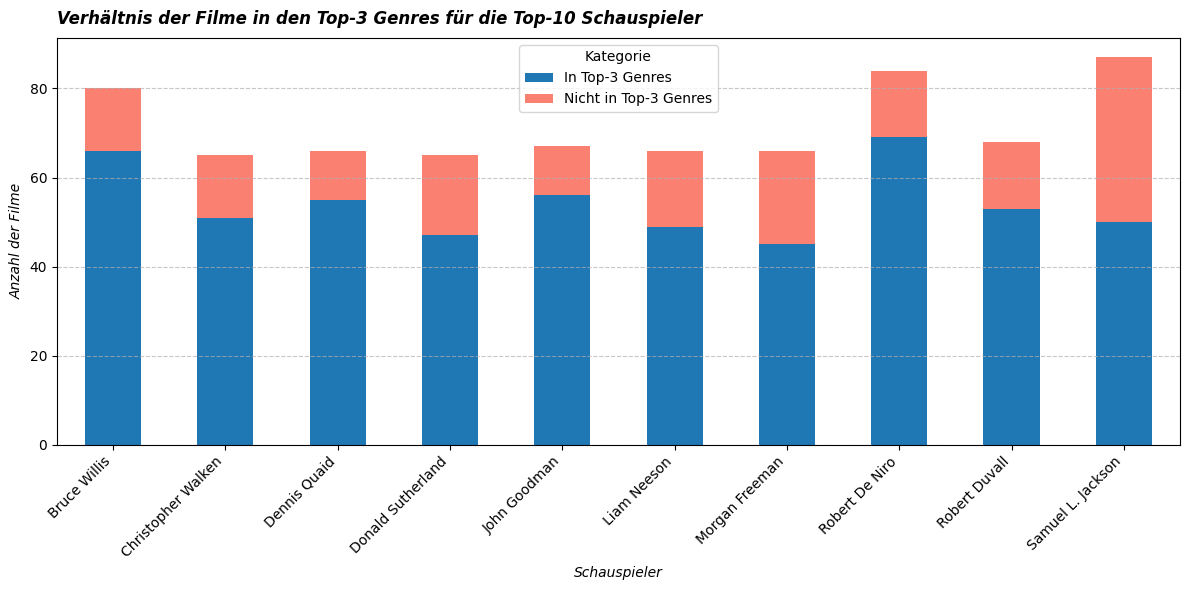

In [18]:
# top_actors – Top 10 Schauspieler (bereits oben definiert)
# top_3_genres – Top 3 Genres (bereits oben definiert)

# 1. Filterung: Nur Filme mit den Top-10 Schauspielern
filtered_top_actors_movies = actors_exploded[actors_exploded['cast'].isin(top_actors.index)].copy()

# 2. Markierung, ob mindestens ein Genre zu den Top-3 gehört
filtered_top_actors_movies['in_top_3_genre'] = filtered_top_actors_movies['genres'].apply(
    lambda x: 'Top 3 Genre' if any(g in top_3_genres for g in x) else 'Other Genres'
)

# 3. Anzahl der Filme pro Schauspieler und Genre-Kategorie
actor_genre_counts = (filtered_top_actors_movies.groupby(['cast', 'in_top_3_genre']).size().unstack(fill_value=0))

# 4. Berechnung der Gesamtanzahl und des Anteils in Top-3-Genres (in %)
actor_genre_counts['total_movies'] = (actor_genre_counts['Top 3 Genre'] + actor_genre_counts['Other Genres'])

actor_genre_counts['percentage_in_top_3_genre'] = (actor_genre_counts['Top 3 Genre'] / actor_genre_counts['total_movies'] * 100).round(2)

# 5. Anzeige der finalen Tabelle mit berechneten Spalten
print(actor_genre_counts[['total_movies', 'Top 3 Genre', 'Other Genres', 'percentage_in_top_3_genre']])

# 6. Erstellung eines gestapelten Balkendiagramms (stacked bar chart)
actor_genre_counts[['Top 3 Genre', 'Other Genres']].plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', 'salmon'])

plt.title('Verhältnis der Filme in den Top-3 Genres für die Top-10 Schauspieler', fontstyle='italic', fontsize='large', loc='left', fontweight='bold', pad=10)
#plt.xlabel('Top-10 Schauspieler')
#plt.ylabel('Anzahl Filme')
plt.xlabel('Schauspieler', fontstyle='italic')
plt.ylabel('Anzahl der Filme', fontstyle='italic')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Kategorie', labels=['In Top-3 Genres', 'Nicht in Top-3 Genres'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()